In [ ]:
#!pip install keras_tuner

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Fungsi untuk menyatukan CSV dari file ZIP
def combine_csv_from_zip(zip_file_path):
    df_list = []
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        csv_files = [f for f in z.namelist() if f.endswith('.csv')]
        for file in csv_files:
            with z.open(file) as f:
                df = pd.read_csv(f)
                df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Path ke file ZIP
zip_file_path = '/content/agree datas.zip'

# Gabungkan CSV dari file ZIP
df_old = combine_csv_from_zip(zip_file_path)

# Pastikan Created_at dalam format datetime
df_old['Created_at'] = pd.to_datetime(df_old['Created_at'])

# Urutkan dari waktu paling lama ke paling baru
df_old = df_old.sort_values(by='Created_at', ascending=True)
df_old = df_old.reset_index(drop=True)

df_old

,Temperature,Humidity,Intensity,Created_at
0,24.66,69.73,1679,2022-09-01 13:09:59
1,24.50,69.70,1589,2022-09-01 13:10:59
2,24.37,69.72,1596,2022-09-01 13:11:57
3,24.23,69.78,1729,2022-09-01 13:13:00
4,24.11,69.86,1896,2022-09-01 13:14:00
...,...,...,...,...
207793,20.49,62.28,0,2023-05-31 23:55:22
207794,20.49,62.28,0,2023-05-31 23:56:23
207795,20.48,62.30,0,2023-05-31 23:57:23
207796,20.48,62.34,0,2023-05-31 23:58:24


# PREPROCESSING & EDA

In [ ]:
# Ubah data menjadi per jam
df = df_old.set_index('Created_at').resample('H').mean().reset_index()

# Tampilkan hasil
print(df)

              Created_at  Temperature   Humidity    Intensity
0    2022-09-01 13:00:00    24.278302  70.690377  3064.301887
1    2022-09-01 14:00:00    26.316167  69.945000  5567.033333
2    2022-09-01 15:00:00    27.847833  68.181500  3063.483333
3    2022-09-01 16:00:00    26.010339  69.454915   893.525424
4    2022-09-01 17:00:00    24.216066  70.114262   333.786885
...                  ...          ...        ...          ...
6534 2023-05-31 19:00:00    22.207167  59.452500     0.000000
6535 2023-05-31 20:00:00    21.708814  60.256610     0.000000
6536 2023-05-31 21:00:00    20.863500  60.950667     0.000000
6537 2023-05-31 22:00:00    20.635424  61.491525     0.000000
6538 2023-05-31 23:00:00    20.573051  62.028136     0.000000

[6539 rows x 4 columns]


In [ ]:
# 1. Informasi dasar dataset
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

# 2. Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Created_at   6539 non-null   datetime64[ns]
 1   Temperature  3546 non-null   float64       
 2   Humidity     3546 non-null   float64       
 3   Intensity    3546 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 204.5 KB
None

Statistik deskriptif:
                Created_at  Temperature     Humidity     Intensity
count                 6539  3546.000000  3546.000000   3546.000000
mean   2023-01-15 18:00:00    23.102837    69.434909   1637.493896
min    2022-09-01 13:00:00    17.276400    54.352881      0.000000
25%    2022-11-08 15:30:00    19.768500    66.084835      0.000000
50%    2023-01-15 18:00:00    21.297705    70.225972     86.841667
75%    2023-03-24 20:30:00    25.981833    73.103674   2732.373799
max    2023-05-31 23:00:00    39.618667   

In [ ]:
# Menampilkan baris dengan missing values
missing_values_df = df[df.isnull().any(axis=1)]

# Tampilkan hasil
print("Baris dengan missing values:")
missing_values_df

Baris dengan missing values:


,Created_at,Temperature,Humidity,Intensity
60,2022-09-04 01:00:00,NaN,NaN,NaN
61,2022-09-04 02:00:00,NaN,NaN,NaN
62,2022-09-04 03:00:00,NaN,NaN,NaN
63,2022-09-04 04:00:00,NaN,NaN,NaN
65,2022-09-04 06:00:00,NaN,NaN,NaN
...,...,...,...,...
6160,2023-05-16 05:00:00,NaN,NaN,NaN
6161,2023-05-16 06:00:00,NaN,NaN,NaN
6162,2023-05-16 07:00:00,NaN,NaN,NaN
6163,2023-05-16 08:00:00,NaN,NaN,NaN


In [ ]:
# # memastikan hasil imputasi benar
# # Filter data untuk jam 7
# df['Hour'] = df['Created_at'].dt.hour  # Tambahkan kolom 'Hour' untuk memudahkan filtering
# df_hour_7 = df[df['Hour'] == 7]  # Filter untuk jam 7

# # Hitung rata-rata untuk Temperature, Humidity, dan Intensity
# average_temperature = df_hour_7['Temperature'].mean()
# average_humidity = df_hour_7['Humidity'].mean()
# average_intensity = df_hour_7['Intensity'].mean()

# # Tampilkan hasil
# print(f"Rata-rata Temperature pada jam 7: {average_temperature}")
# print(f"Rata-rata Humidity pada jam 7: {average_humidity}")
# print(f"Rata-rata Intensity pada jam 7: {average_intensity}")

In [ ]:
# Simpan salinan DataFrame sebelum imputasi
df_before_imputation = df.copy()

# Tambahkan kolom baru untuk menyimpan jam dari Created_at
df['Hour'] = df['Created_at'].dt.hour

# Hitung rata-rata per jam untuk setiap kolom
mean_values = df.groupby('Hour').mean()

# Gantikan missing values dengan rata-rata per jam
for col in ['Temperature', 'Humidity', 'Intensity']:
    df[col].fillna(df['Hour'].map(mean_values[col]), inplace=True)

# Tampilkan baris yang sebelumnya memiliki missing values
imputed_rows = df[df.isnull().any(axis=1) == False]  # Mengambil baris yang tidak lagi memiliki missing values
imputed_rows = imputed_rows[df_before_imputation.isnull().any(axis=1)]  # Hanya ambil baris yang sebelumnya NaN

# Tampilkan hasil
print("\nBaris yang sudah diimputasi:")
imputed_rows


Baris yang sudah diimputasi:


,Created_at,Temperature,Humidity,Intensity,Hour
60,2022-09-04 01:00:00,19.615279,71.587298,0.000000,1
61,2022-09-04 02:00:00,19.473172,71.837804,0.000000,2
62,2022-09-04 03:00:00,19.354496,72.063105,0.000000,3
63,2022-09-04 04:00:00,19.209526,72.254558,0.000000,4
65,2022-09-04 06:00:00,19.795275,72.602178,713.911119,6
...,...,...,...,...,...
6160,2023-05-16 05:00:00,19.118824,72.498882,58.988585,5
6161,2023-05-16 06:00:00,19.795275,72.602178,713.911119,6
6162,2023-05-16 07:00:00,22.255675,71.934856,2071.118767,7
6163,2023-05-16 08:00:00,25.460944,70.162314,3749.846782,8


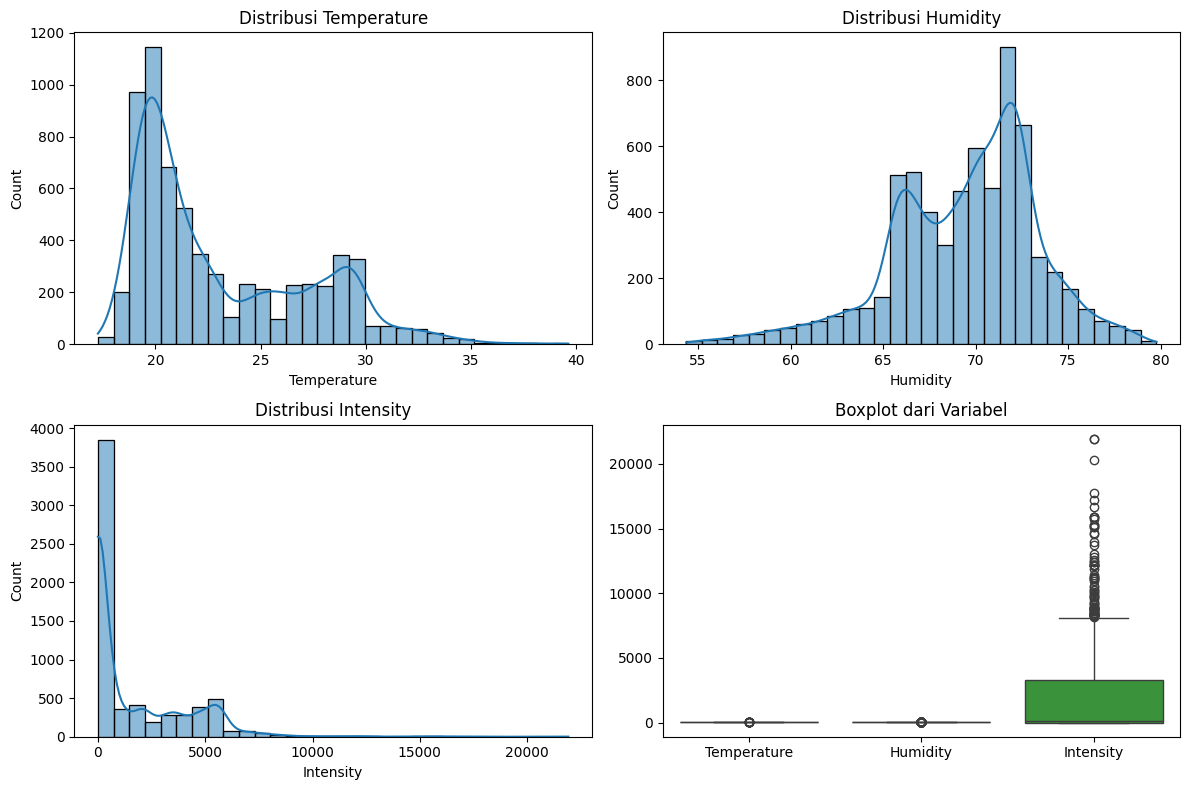

In [ ]:
# Visualisasi Distribusi
plt.figure(figsize=(12, 8))

# Histogram untuk Temperature
plt.subplot(2, 2, 1)
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Distribusi Temperature')

# Histogram untuk Humidity
plt.subplot(2, 2, 2)
sns.histplot(df['Humidity'], bins=30, kde=True)
plt.title('Distribusi Humidity')

# Histogram untuk Intensity
plt.subplot(2, 2, 3)
sns.histplot(df['Intensity'], bins=30, kde=True)
plt.title('Distribusi Intensity')

# Boxplot untuk ketiga variabel
plt.subplot(2, 2, 4)
sns.boxplot(data=df[['Temperature', 'Humidity', 'Intensity']])
plt.title('Boxplot dari Variabel')

plt.tight_layout()
plt.show()

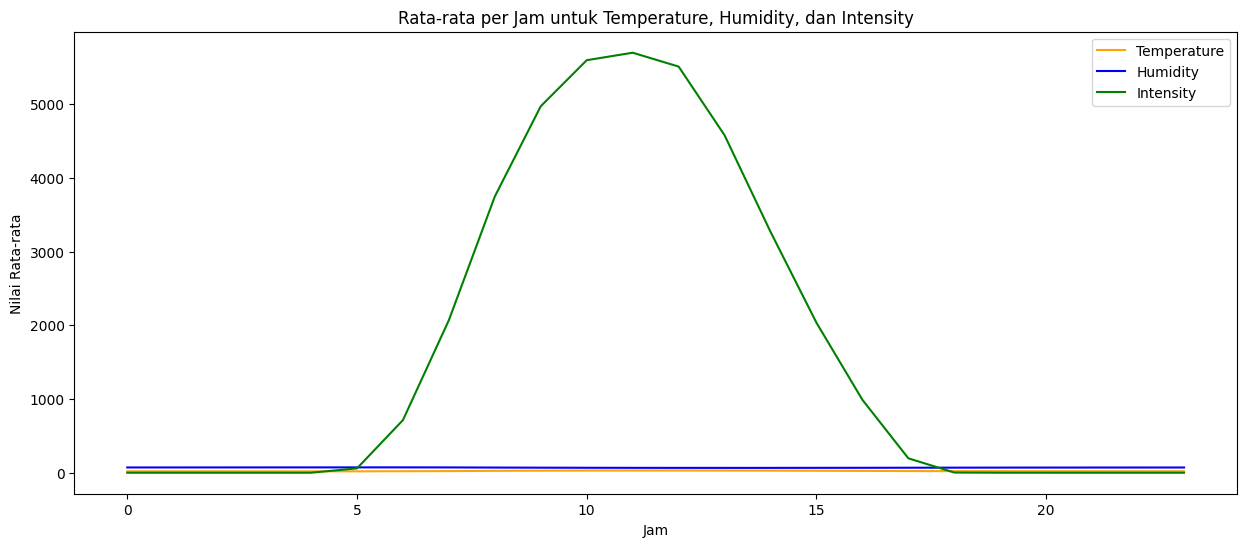

In [ ]:
# Analisis Rata-rata per Jam
hourly_avg = df.groupby('Hour').mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Hour', y='Temperature', data=hourly_avg, label='Temperature', color='orange')
sns.lineplot(x='Hour', y='Humidity', data=hourly_avg, label='Humidity', color='blue')
sns.lineplot(x='Hour', y='Intensity', data=hourly_avg, label='Intensity', color='green')
plt.title('Rata-rata per Jam untuk Temperature, Humidity, dan Intensity')
plt.xlabel('Jam')
plt.ylabel('Nilai Rata-rata')
plt.legend()
plt.show()

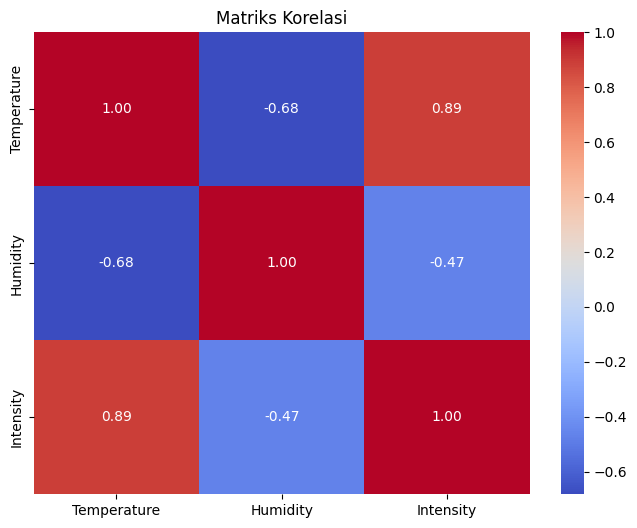

In [ ]:
# Korelasi Antara Variabel
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Temperature', 'Humidity', 'Intensity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

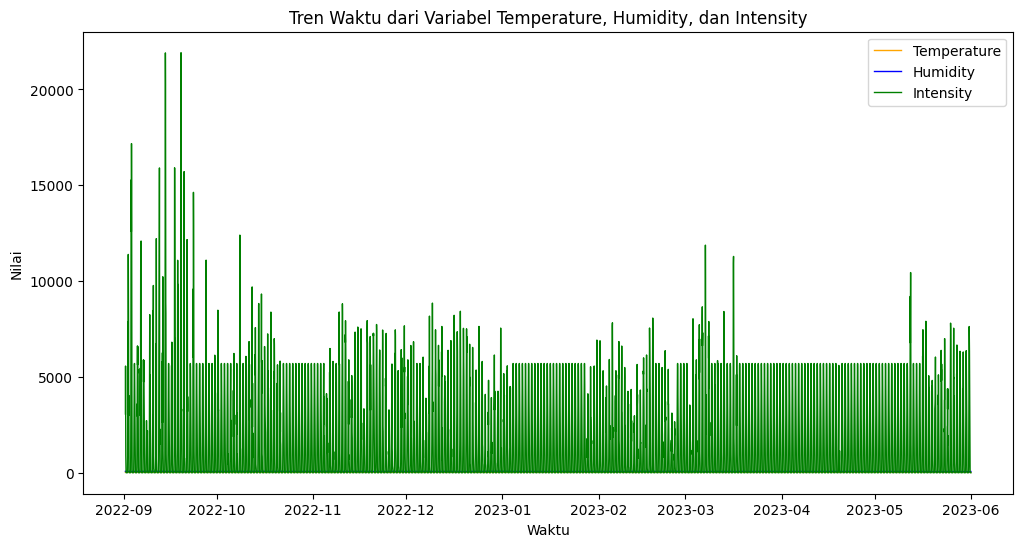

In [ ]:
# Visualisasi Tren Waktu
plt.figure(figsize=(12, 6))
plt.plot(df['Created_at'], df['Temperature'], label='Temperature', color='orange', linewidth=1)
plt.plot(df['Created_at'], df['Humidity'], label='Humidity', color='blue', linewidth=1)
plt.plot(df['Created_at'], df['Intensity'], label='Intensity', color='green', linewidth=1)
plt.title('Tren Waktu dari Variabel Temperature, Humidity, dan Intensity')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.show()

In [ ]:
df

,Created_at,Temperature,Humidity,Intensity,Hour
0,2022-09-01 13:00:00,24.278302,70.690377,3064.301887,13
1,2022-09-01 14:00:00,26.316167,69.945000,5567.033333,14
2,2022-09-01 15:00:00,27.847833,68.181500,3063.483333,15
3,2022-09-01 16:00:00,26.010339,69.454915,893.525424,16
4,2022-09-01 17:00:00,24.216066,70.114262,333.786885,17
...,...,...,...,...,...
6534,2023-05-31 19:00:00,22.207167,59.452500,0.000000,19
6535,2023-05-31 20:00:00,21.708814,60.256610,0.000000,20
6536,2023-05-31 21:00:00,20.863500,60.950667,0.000000,21
6537,2023-05-31 22:00:00,20.635424,61.491525,0.000000,22


# Model Forecasting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Membuat kolom VPD
def calculate_vpd(temperature, humidity):
    svp = 0.6108 * np.exp((17.27 * temperature) / (temperature + 237.3))
    vpd = svp * (1 - humidity / 100)
    return vpd

df['VPD'] = calculate_vpd(df['Temperature'], df['Humidity'])

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Temperature', 'Humidity', 'Intensity', 'VPD']])

# Membuat data time series dengan window
def create_time_series(data, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])  # Label adalah nilai setelah window
    return np.array(X), np.array(y)

window_size = 24  # Menggunakan 24 jam sebelumnya untuk memprediksi
X, y = create_time_series(scaled_data, window_size)

# Memisahkan data training dan testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=False))
model.add(Dense(4))  # 4 output untuk prediksi (Temperature, Humidity, Intensity, VPD)

model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Melakukan prediksi
predictions = model.predict(X_test)

# Mengubah skala kembali ke nilai aslinya
predicted_values = scaler.inverse_transform(predictions)

# Menampilkan hasil prediksi
predicted_values

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0232 - val_loss: 0.0039
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 9.9851e-04
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ 23.160406  ,  67.788055  , 568.9214    ,   0.91337633],
       [ 21.801493  ,  68.76062   ,  59.315834  ,   0.80213916],
       [ 20.974804  ,  69.494     , -87.08213   ,   0.7417598 ],
       ...,
       [ 21.442553  ,  61.666843  ,  98.46395   ,   0.9783168 ],
       [ 21.034328  ,  62.174873  , 205.58006   ,   0.93233085],
       [ 20.819546  ,  62.556427  , 320.7046    ,   0.9059071 ]],
      dtype=float32)

In [ ]:
# Membuat DataFrame untuk nilai prediksi dan nilai asli
predicted_df = pd.DataFrame(predicted_values, columns=['Pred_Temperature', 'Pred_Humidity', 'Pred_Intensity', 'Pred_VPD'])
actual_df = pd.DataFrame(scaler.inverse_transform(y_test), columns=['Actual_Temperature', 'Actual_Humidity', 'Actual_Intensity', 'Actual_VPD'])

# Gabungkan kedua DataFrame untuk membandingkan prediksi dan aktual
comparison_df = pd.concat([actual_df, predicted_df], axis=1)

# Menampilkan beberapa baris pertama dari hasil perbandingan
comparison_df

,Actual_Temperature,Actual_Humidity,Actual_Intensity,Actual_VPD,Pred_Temperature,Pred_Humidity,Pred_Intensity,Pred_VPD
0,22.774156,67.838186,195.242646,0.891297,23.160406,67.788055,568.921387,0.913376
1,21.522989,68.788472,2.441011,0.801521,21.801493,68.760620,59.315834,0.802139
2,21.006859,69.479932,0.005650,0.759356,20.974804,69.494003,-87.082130,0.741760
3,20.694054,69.943589,0.000000,0.733572,20.612492,69.958427,-22.356020,0.720984
4,20.449528,70.346259,0.000000,0.712919,20.437283,70.293312,83.930634,0.711686
...,...,...,...,...,...,...,...,...
1298,22.207167,59.452500,0.000000,1.085660,22.530300,60.480358,-147.021301,1.091346
1299,21.708814,60.256610,0.000000,1.032282,21.822952,61.165516,-61.824547,1.020786
1300,20.863500,60.950667,0.000000,0.963046,21.442553,61.666843,98.463951,0.978317
1301,20.635424,61.491525,0.000000,0.936470,21.034328,62.174873,205.580063,0.932331


In [ ]:
# Ambil data dari sebelum 2023-05-25 sebagai input untuk prediksi
input_data = df[df['Created_at'] < prediction_start_date].tail(window_size)

# Scale input data
scaled_input_data = scaler.transform(input_data[['Temperature', 'Humidity', 'Intensity', 'VPD']])

# Ubah ke format yang bisa diterima oleh LSTM (1, timesteps, features)
X_input = np.reshape(scaled_input_data, (1, window_size, 4))  # 1 batch, window_size timesteps, 4 features

# Inisialisasi list untuk menyimpan prediksi
predicted_values = []

# Prediksi untuk 7 hari ke depan (168 jam)
for i in range(7 * 24):  # 7 hari ke depan, 24 jam per hari
    # Prediksi menggunakan model
    prediction = model.predict(X_input)

    # Simpan prediksi
    predicted_values.append(prediction[0])

    # Update input untuk prediksi berikutnya, buang data paling lama dan tambahkan prediksi terbaru
    new_input = np.append(X_input[:, 1:, :], [prediction], axis=1)  # Append the new prediction
    X_input = np.reshape(new_input, (1, window_size, 4))  # Reshape for the next prediction

# Ubah skala prediksi kembali ke nilai aslinya
predicted_values = scaler.inverse_transform(predicted_values)

# Buat DataFrame dengan waktu prediksi
prediction_dates = pd.date_range(start=prediction_start_date, periods=7*24, freq='H')
predicted_df = pd.DataFrame(predicted_values, columns=['Pred_Temperature', 'Pred_Humidity', 'Pred_Intensity', 'Pred_VPD'])
predicted_df['Created_at'] = prediction_dates

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [ ]:
# Mengubah kolom 'Created_at' ke format datetime jika belum
df['Created_at'] = pd.to_datetime(df['Created_at'])

# Menentukan rentang tanggal
start_date = '2023-05-25'
end_date = '2023-05-31'

# Memfilter DataFrame berdasarkan rentang tanggal
filtered_df = df[(df['Created_at'] >= start_date) & (df['Created_at'] <= end_date)]

In [ ]:
import pandas as pd

# Pastikan kolom 'Created_at' di kedua DataFrame dalam format datetime
predicted_df['Created_at'] = pd.to_datetime(predicted_df['Created_at'])
filtered_df['Created_at'] = pd.to_datetime(filtered_df['Created_at'])

# Menggabungkan DataFrame berdasarkan 'Created_at'
comparison_df = pd.merge(filtered_df, predicted_df, on='Created_at', how='outer')

# Tampilkan hasil perbandingan
comparison_df[['Created_at', 'Temperature', 'Humidity', 'Intensity', 'VPD',
                     'Pred_Temperature', 'Pred_Humidity', 'Pred_Intensity', 'Pred_VPD']]

<ipython-input-291-a40121e48dfc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Created_at'] = pd.to_datetime(filtered_df['Created_at'])


,Created_at,Temperature,Humidity,Intensity,VPD,Pred_Temperature,Pred_Humidity,Pred_Intensity,Pred_VPD
0,2023-05-25 00:00:00,20.791864,66.062203,0.0,0.833304,20.627223,66.291821,275.041200,0.818217
1,2023-05-25 01:00:00,20.407833,66.259000,0.0,0.809099,20.666708,66.533155,390.689619,0.816727
2,2023-05-25 02:00:00,19.571667,66.626500,0.0,0.759913,20.758625,66.752989,507.267763,0.818956
3,2023-05-25 03:00:00,19.061000,67.004833,0.0,0.727797,20.940462,66.933313,655.861114,0.827121
4,2023-05-25 04:00:00,18.548644,67.179492,0.0,0.701136,21.301394,67.022894,890.727386,0.847303
...,...,...,...,...,...,...,...,...,...
163,2023-05-31 19:00:00,NaN,NaN,NaN,NaN,21.408399,70.786954,520.521382,0.743864
164,2023-05-31 20:00:00,NaN,NaN,NaN,NaN,21.230079,71.061288,542.079660,0.731556
165,2023-05-31 21:00:00,NaN,NaN,NaN,NaN,21.109989,71.302414,572.824801,0.722843
166,2023-05-31 22:00:00,NaN,NaN,NaN,NaN,21.023163,71.528066,601.591764,0.715471


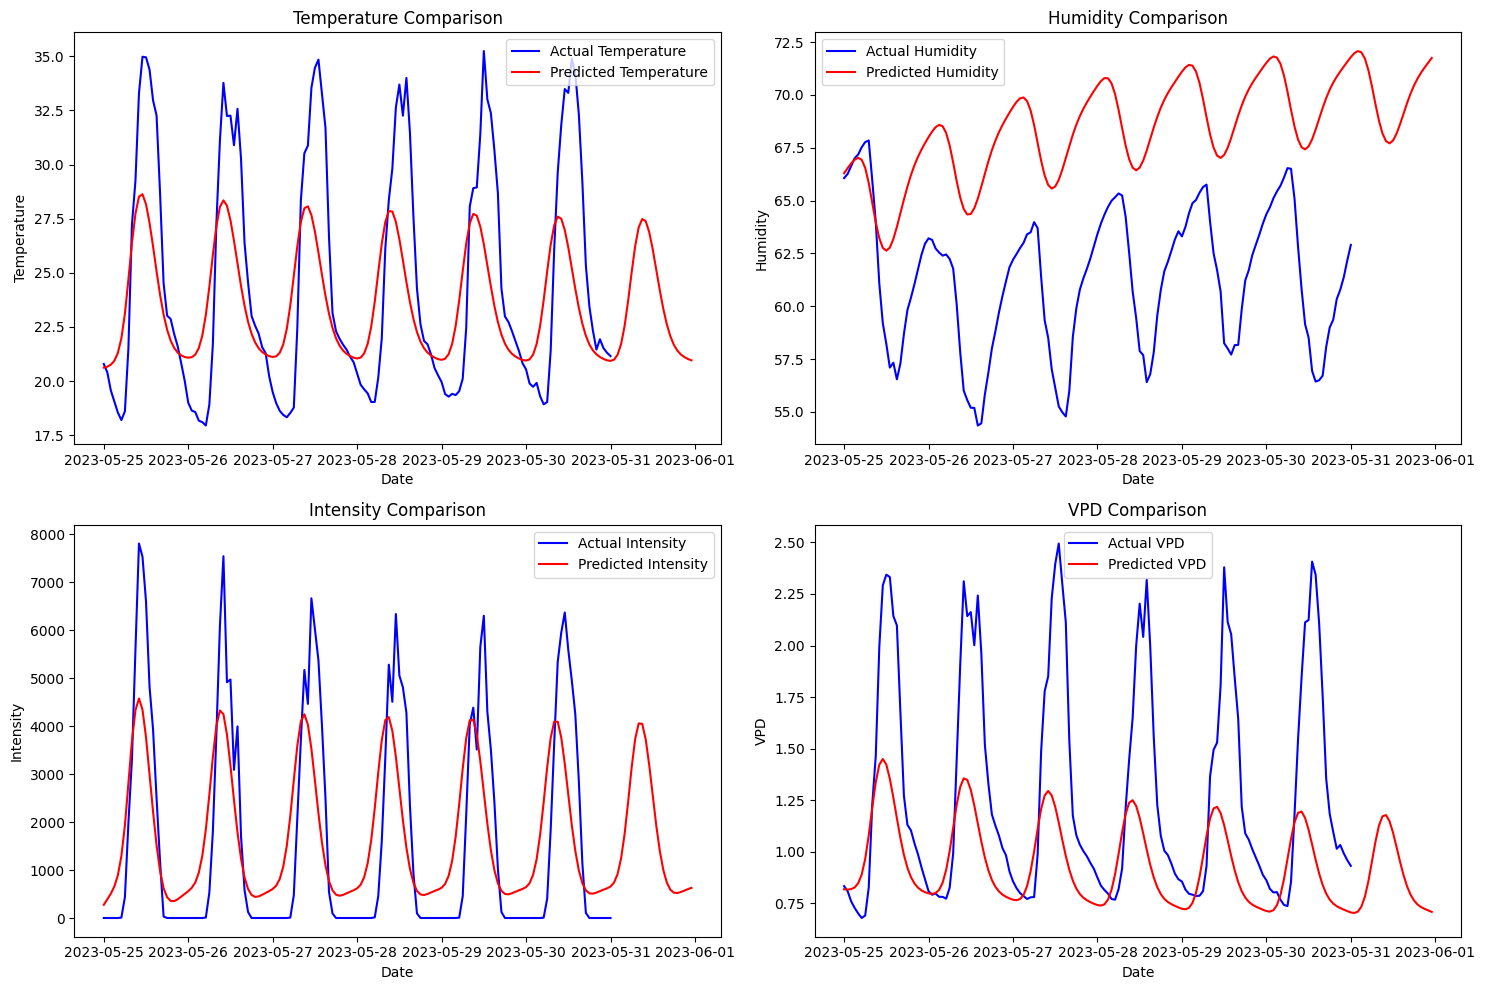

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plot suhu
plt.subplot(2, 2, 1)
plt.plot(comparison_df['Created_at'], comparison_df['Temperature'], label='Actual Temperature', color='blue')
plt.plot(comparison_df['Created_at'], comparison_df['Pred_Temperature'], label='Predicted Temperature', color='red')
plt.title('Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

# Plot kelembaban
plt.subplot(2, 2, 2)
plt.plot(comparison_df['Created_at'], comparison_df['Humidity'], label='Actual Humidity', color='blue')
plt.plot(comparison_df['Created_at'], comparison_df['Pred_Humidity'], label='Predicted Humidity', color='red')
plt.title('Humidity Comparison')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()

# Plot intensitas
plt.subplot(2, 2, 3)
plt.plot(comparison_df['Created_at'], comparison_df['Intensity'], label='Actual Intensity', color='blue')
plt.plot(comparison_df['Created_at'], comparison_df['Pred_Intensity'], label='Predicted Intensity', color='red')
plt.title('Intensity Comparison')
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.legend()

# Plot VPD
plt.subplot(2, 2, 4)
plt.plot(comparison_df['Created_at'], comparison_df['VPD'], label='Actual VPD', color='blue')
plt.plot(comparison_df['Created_at'], comparison_df['Pred_VPD'], label='Predicted VPD', color='red')
plt.title('VPD Comparison')
plt.xlabel('Date')
plt.ylabel('VPD')
plt.legend()

plt.tight_layout()
plt.show()

# SIMULATOR GH

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Fungsi untuk simulasi perubahan suhu udara
# def simulate_temperature(initial_temp, time_steps, temp_change_rate):
#     temperatures = np.zeros(time_steps)
#     temperatures[0] = initial_temp
#     for t in range(1, time_steps):
#         temperatures[t] = temperatures[t-1] + np.random.normal(temp_change_rate, 1)
#     return temperatures

# # Fungsi untuk simulasi radiasi matahari
# def simulate_solar_radiation(initial_radiation, time_steps, radiation_change_rate):
#     radiations = np.zeros(time_steps)
#     radiations[0] = initial_radiation
#     for t in range(1, time_steps):
#         radiations[t] = radiations[t-1] + np.random.normal(radiation_change_rate, 5)
#     return radiations

# # Fungsi untuk simulasi kelembapan relatif
# def simulate_humidity(initial_humidity, time_steps, humidity_change_rate):
#     humidities = np.zeros(time_steps)
#     humidities[0] = initial_humidity
#     for t in range(1, time_steps):
#         humidities[t] = humidities[t-1] + np.random.normal(humidity_change_rate, 2)
#     return humidities

# # Fungsi untuk simulasi tekanan udara
# def simulate_air_pressure(initial_pressure, time_steps, pressure_change_rate):
#     pressures = np.zeros(time_steps)
#     pressures[0] = initial_pressure
#     for t in range(1, time_steps):
#         pressures[t] = pressures[t-1] + np.random.normal(pressure_change_rate, 0.5)
#     return pressures

# # Fungsi untuk simulasi evapotranspirasi
# def simulate_evapotranspiration(initial_evapotranspiration, time_steps, evapotranspiration_change_rate):
#     evapotranspirations = np.zeros(time_steps)
#     evapotranspirations[0] = initial_evapotranspiration
#     for t in range(1, time_steps):
#         evapotranspirations[t] = evapotranspirations[t-1] + np.random.normal(evapotranspiration_change_rate, 0.1)
#     return evapotranspirations

# # Parameter awal
# initial_temp = 25.0  # Celsius
# initial_radiation = 200.0  # W/m^2
# initial_humidity = 60.0  # %
# initial_pressure = 1013.0  # hPa
# initial_evapotranspiration = 4.0  # mm/day

# # Rate perubahan
# temp_change_rate = 0.1
# radiation_change_rate = 5.0
# humidity_change_rate = 0.2
# pressure_change_rate = 0.1
# evapotranspiration_change_rate = 0.05

# # Jumlah langkah waktu
# time_steps = 100

# # Simulasi
# temperatures = simulate_temperature(initial_temp, time_steps, temp_change_rate)
# radiations = simulate_solar_radiation(initial_radiation, time_steps, radiation_change_rate)
# humidities = simulate_humidity(initial_humidity, time_steps, humidity_change_rate)
# pressures = simulate_air_pressure(initial_pressure, time_steps, pressure_change_rate)
# evapotranspirations = simulate_evapotranspiration(initial_evapotranspiration, time_steps, evapotranspiration_change_rate)

# # Plot hasil simulasi
# plt.figure(figsize=(12, 8))

# plt.subplot(5, 1, 1)
# plt.plot(temperatures, label='Temperature (Celsius)')
# plt.xlabel('Time Steps')
# plt.ylabel('Temperature (C)')
# plt.legend()

# plt.subplot(5, 1, 2)
# plt.plot(radiations, label='Solar Radiation (W/m^2)', color='orange')
# plt.xlabel('Time Steps')
# plt.ylabel('Solar Radiation (W/m^2)')
# plt.legend()

# plt.subplot(5, 1, 3)
# plt.plot(humidities, label='Humidity (%)', color='green')
# plt.xlabel('Time Steps')
# plt.ylabel('Humidity (%)')
# plt.legend()

# plt.subplot(5, 1, 4)
# plt.plot(pressures, label='Air Pressure (hPa)', color='blue')
# plt.xlabel('Time Steps')
# plt.ylabel('Air Pressure (hPa)')
# plt.legend()

# plt.subplot(5, 1, 5)
# plt.plot(evapotranspirations, label='Evapotranspiration (mm/day)', color='red')
# plt.xlabel('Time Steps')
# plt.ylabel('Evapotranspiration (mm/day)')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# # @title
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Fungsi untuk membuat data simulasi
# def generate_data(size_x, size_y, initial_value, change_rate):
#     data = np.zeros((size_x, size_y))
#     data[0, 0] = initial_value
#     for x in range(size_x):
#         for y in range(size_y):
#             if x > 0:
#                 data[x, y] = data[x-1, y] + np.random.normal(change_rate, 1)
#             if y > 0:
#                 data[x, y] += data[x, y-1] + np.random.normal(change_rate, 1)
#             data[x, y] = np.clip(data[x, y], 0, 100)  # Membatasi nilai agar tidak negatif dan tidak melebihi 100
#     return data

# # Parameter simulasi
# size_x, size_y = 10, 10
# initial_value = 25.0  # nilai awal suhu atau parameter lainnya
# change_rate = 0.5

# # Simulasi data suhu udara
# temperature_data = generate_data(size_x, size_y, initial_value, change_rate)

# # Plot heatmap suhu udara
# plt.figure(figsize=(10, 8))
# sns.heatmap(temperature_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
# plt.title('Heatmap of Air Temperature in Greenhouse')
# plt.xlabel('X Position')
# plt.ylabel('Y Position')
# plt.show()

In [ ]:
# # @title
# import numpy as np
# import plotly.graph_objects as go

# # Fungsi untuk membuat data simulasi
# def generate_3d_data(size_x, size_y, size_z, initial_value, change_rate):
#     data = np.zeros((size_x, size_y, size_z))
#     for x in range(size_x):
#         for y in range(size_y):
#             for z in range(size_z):
#                 data[x, y, z] = initial_value + np.random.normal(change_rate, 1)
#     return data

# # Parameter simulasi
# size_x, size_y, size_z = 10, 10, 10
# initial_value = 25.0
# change_rate = 0.5

# # Simulasi data suhu udara
# temperature_data = generate_3d_data(size_x, size_y, size_z, initial_value, change_rate)

# # Membuat data untuk plot
# x, y, z = np.indices(temperature_data.shape)
# x, y, z = x.flatten(), y.flatten(), z.flatten()
# temperature = temperature_data.flatten()

# # Plot 3D interaktif suhu udara
# fig = go.Figure(data=go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=temperature,
#         colorscale='Viridis',
#         colorbar=dict(title='Temperature (Celsius)')
#     )
# ))

# fig.update_layout(
#     title='Interactive 3D Heatmap of Air Temperature in Greenhouse',
#     scene=dict(
#         xaxis_title='X Position',
#         yaxis_title='Y Position',
#         zaxis_title='Z Position'
#     )
# )

# fig.show()

In [ ]:
# # @title
# import numpy as np
# import plotly.graph_objects as go

# # Simulasi data grid (misal ukuran grid 5x5x5)
# x = np.random.randint(0, 5, 50)
# y = np.random.randint(0, 5, 50)
# z = np.random.randint(0, 5, 50)
# temperature = np.random.uniform(25, 35, 50)

# # Plot 3D data suhu dengan koordinat x, y, z
# fig = go.Figure(data=go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=temperature,
#         colorscale='Viridis',
#         colorbar=dict(title='Temperature (Celsius)')
#     )
# ))

# fig.update_layout(
#     title='Distribusi Suhu 3D di Greenhouse',
#     scene=dict(
#         xaxis_title='X Position',
#         yaxis_title='Y Position',
#         zaxis_title='Z Position'
#     )
# )

# fig.show()